In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ta.trend import MACD
from io import StringIO
import requests

# API Key de Alpha Vantage
api_key = "CW8ZHIC5A9DKYDVQ"

# Endpoint para USD/BRL diario (gratuito)
url = f"https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=USD&to_symbol=BRL&apikey={api_key}&datatype=csv"

# Obtener datos
res = requests.get(url)

# Leer CSV desde el texto de la respuesta
dados = pd.read_csv(StringIO(res.text))

# Cambiar nombres de columnas y convertir fechas
dados.rename(columns={'timestamp': 'Date', 'close': 'Close'}, inplace=True)
dados["Date"] = pd.to_datetime(dados["Date"])
dados.sort_values("Date", inplace=True)
dados.reset_index(drop=True, inplace=True)

# Mostrar las primeras filas
dados.head()




NameError: name 'projeto_ia_trader' is not defined

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ta.trend import MACD
from io import StringIO
import requests

# API Key de Alpha Vantage
api_key = "CW8ZHIC5A9DKYDVQ"

# Endpoint para USD/BRL diario (gratuito)
url = f"https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=USD&to_symbol=BRL&apikey={api_key}&datatype=csv"

# Obtener datos
res = requests.get(url)

# Leer CSV desde el texto de la respuesta
dados = pd.read_csv(StringIO(res.text))

# Cambiar nombres de columnas y convertir fechas
dados.rename(columns={'timestamp': 'Date', 'close': 'Close'}, inplace=True)
dados["Date"] = pd.to_datetime(dados["Date"])
dados.sort_values("Date", inplace=True)
dados.reset_index(drop=True, inplace=True)

# Mostrar las primeras filas
dados.head()


,Date,open,high,low,Close
0,2025-01-02,6.1840,6.2271,6.1440,6.1519
1,2025-01-03,6.1589,6.2005,6.1351,6.1811
2,2025-01-06,6.1811,6.1883,6.0917,6.1133
3,2025-01-07,6.1133,6.1184,6.0532,6.1029
4,2025-01-08,6.1029,6.1559,6.1010,6.1195


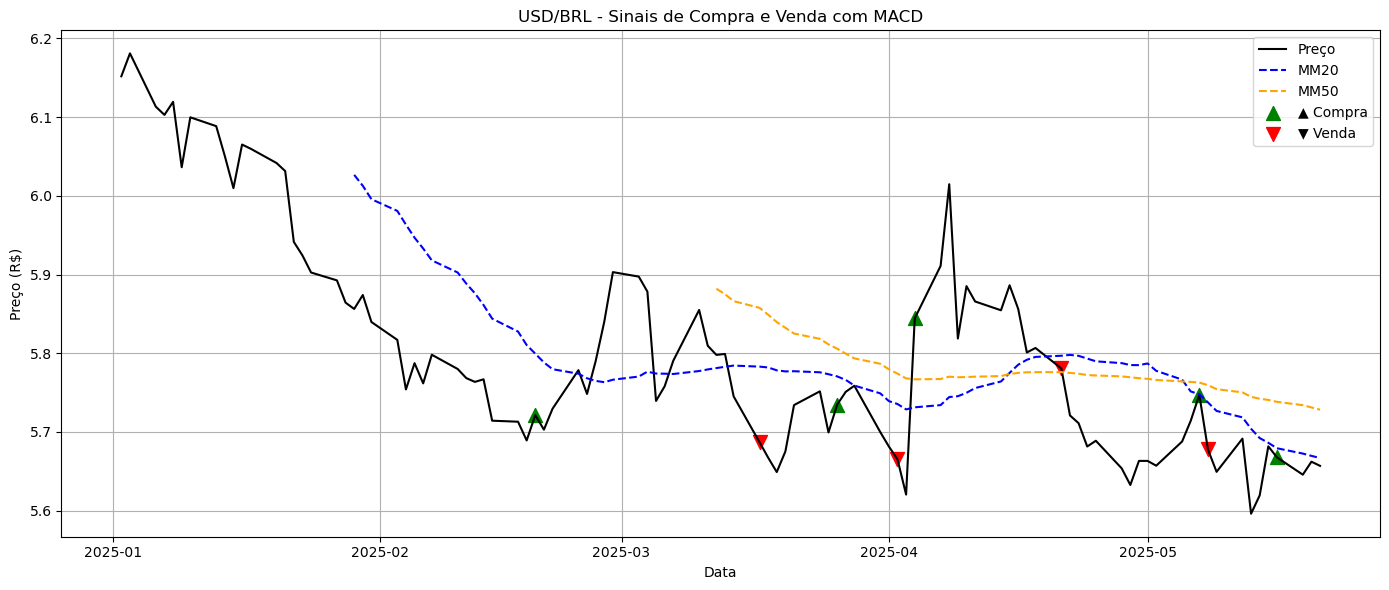

In [2]:
from ta.trend import MACD

# Calcular medias móviles
dados["MM20"] = dados["Close"].rolling(window=20).mean()
dados["MM50"] = dados["Close"].rolling(window=50).mean()

# Calcular MACD
macd_calc = MACD(close=dados["Close"], window_slow=26, window_fast=12, window_sign=9)
dados["MACD"] = macd_calc.macd()
dados["MACD_Sinal"] = macd_calc.macd_signal()
dados["MACD_Histograma"] = macd_calc.macd_diff()

# Señales de compra (cuando MACD cruza por encima de la señal)
dados["Compra"] = (dados["MACD"] > dados["MACD_Sinal"]) & (dados["MACD"].shift(1) <= dados["MACD_Sinal"].shift(1))

# Señales de venta (cuando MACD cruza por debajo de la señal)
dados["Venda"] = (dados["MACD"] < dados["MACD_Sinal"]) & (dados["MACD"].shift(1) >= dados["MACD_Sinal"].shift(1))

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(dados["Date"], dados["Close"], label="Preço", color="black")
plt.plot(dados["Date"], dados["MM20"], label="MM20", linestyle="--", color="blue")
plt.plot(dados["Date"], dados["MM50"], label="MM50", linestyle="--", color="orange")

# Marcar señales
plt.scatter(dados.loc[dados["Compra"], "Date"], dados.loc[dados["Compra"], "Close"],
            label="▲ Compra", color="green", marker="^", s=100)
plt.scatter(dados.loc[dados["Venda"], "Date"], dados.loc[dados["Venda"], "Close"],
            label="▼ Venda", color="red", marker="v", s=100)

plt.title("USD/BRL - Sinais de Compra e Venda com MACD")
plt.xlabel("Data")
plt.ylabel("Preço (R$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


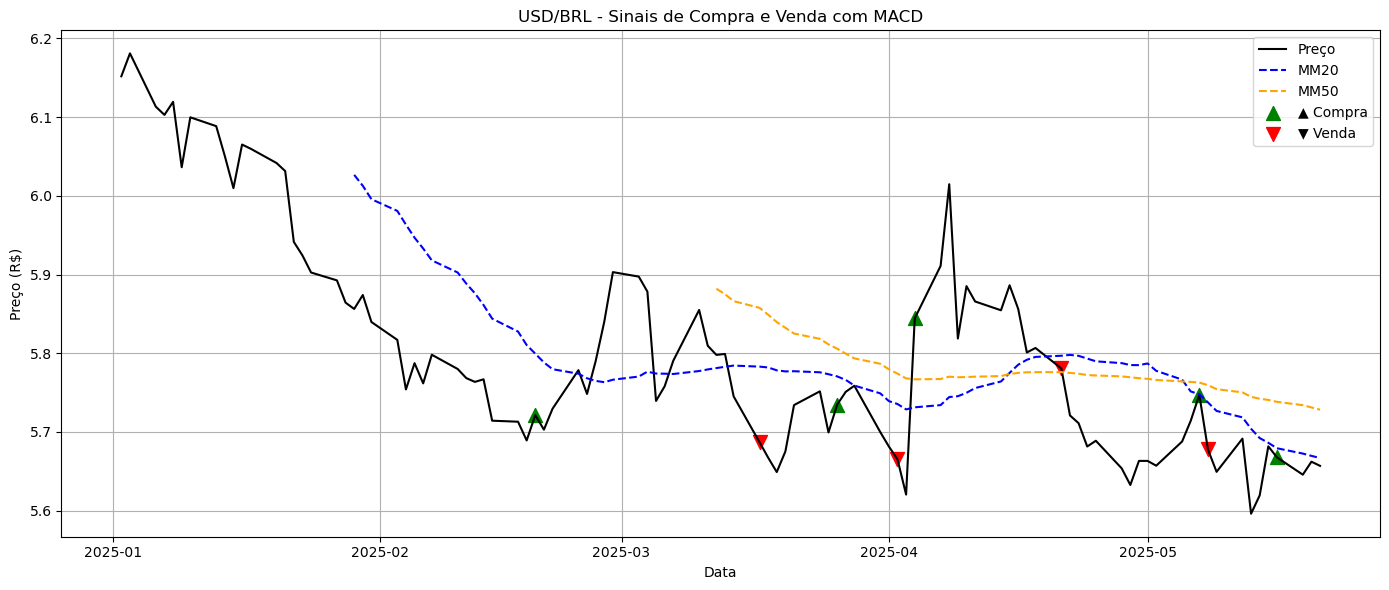

In [3]:
from ta.trend import MACD
import matplotlib.pyplot as plt

# Calcular medias móveis
dados["MM20"] = dados["Close"].rolling(window=20).mean()
dados["MM50"] = dados["Close"].rolling(window=50).mean()

# Calcular MACD
macd_calc = MACD(close=dados["Close"], window_slow=26, window_fast=12, window_sign=9)
dados["MACD"] = macd_calc.macd()
dados["MACD_Sinal"] = macd_calc.macd_signal()
dados["MACD_Histograma"] = macd_calc.macd_diff()

# Identificar sinais de compra e venda
dados["Compra"] = (dados["MACD"] > dados["MACD_Sinal"]) & (dados["MACD"].shift(1) <= dados["MACD_Sinal"].shift(1))
dados["Venda"] = (dados["MACD"] < dados["MACD_Sinal"]) & (dados["MACD"].shift(1) >= dados["MACD_Sinal"].shift(1))

# Plotar gráfico com sinais
plt.figure(figsize=(14, 6))
plt.plot(dados["Date"], dados["Close"], label="Preço", color="black")
plt.plot(dados["Date"], dados["MM20"], label="MM20", linestyle="--", color="blue")
plt.plot(dados["Date"], dados["MM50"], label="MM50", linestyle="--", color="orange")

# Marcar sinais de compra e venda
plt.scatter(dados.loc[dados["Compra"], "Date"], dados.loc[dados["Compra"], "Close"],
            label="▲ Compra", color="green", marker="^", s=100)
plt.scatter(dados.loc[dados["Venda"], "Date"], dados.loc[dados["Venda"], "Close"],
            label="▼ Venda", color="red", marker="v", s=100)

plt.title("USD/BRL - Sinais de Compra e Venda com MACD")
plt.xlabel("Data")
plt.ylabel("Preço (R$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
def decisao_ia(row):
    if row["MACD"] > row["MACD_Sinal"] and row["Close"] > row["MM20"]:
        return "📈 Comprar"
    elif row["MACD"] < row["MACD_Sinal"] and row["Close"] < row["MM20"]:
        return "📉 Vender"
    else:
        return "⏳ Esperar"

# Aplicar a la última línea (día más reciente)
ultima_linha = dados.iloc[-1]
recomendacion = decisao_ia(ultima_linha)

print("📊 Recomendación de la IA para hoy:")
print(f"➡️ {recomendacion}")


📊 Recomendación de la IA para hoy:
➡️ ⏳ Esperar


In [5]:
# Calcular media móvil de volumen
dados["Volume_Medio"] = dados["volume"].rolling(window=20).mean()

# Definir la lógica de decisión con volumen
def decisao_ia(row):
    if (
        row["MACD"] > row["MACD_Sinal"]
        and row["Close"] > row["MM20"]
        and row["volume"] > row["Volume_Medio"]
    ):
        return "📈 Comprar"
    
    elif (
        row["MACD"] < row["MACD_Sinal"]
        and row["Close"] < row["MM20"]
        and row["volume"] > row["Volume_Medio"]
    ):
        return "📉 Vender"
    
    else:
        return "⏳ Esperar"

# Aplicar a la última línea (día más reciente)
ultima_linha = dados.iloc[-1]
recomendacion = decisao_ia(ultima_linha)

print("🔍 Recomendación de la IA para hoy (con volumen):")
print(f"👉 {recomendacion}")


KeyError: 'volume'

KeyError: 'volume'

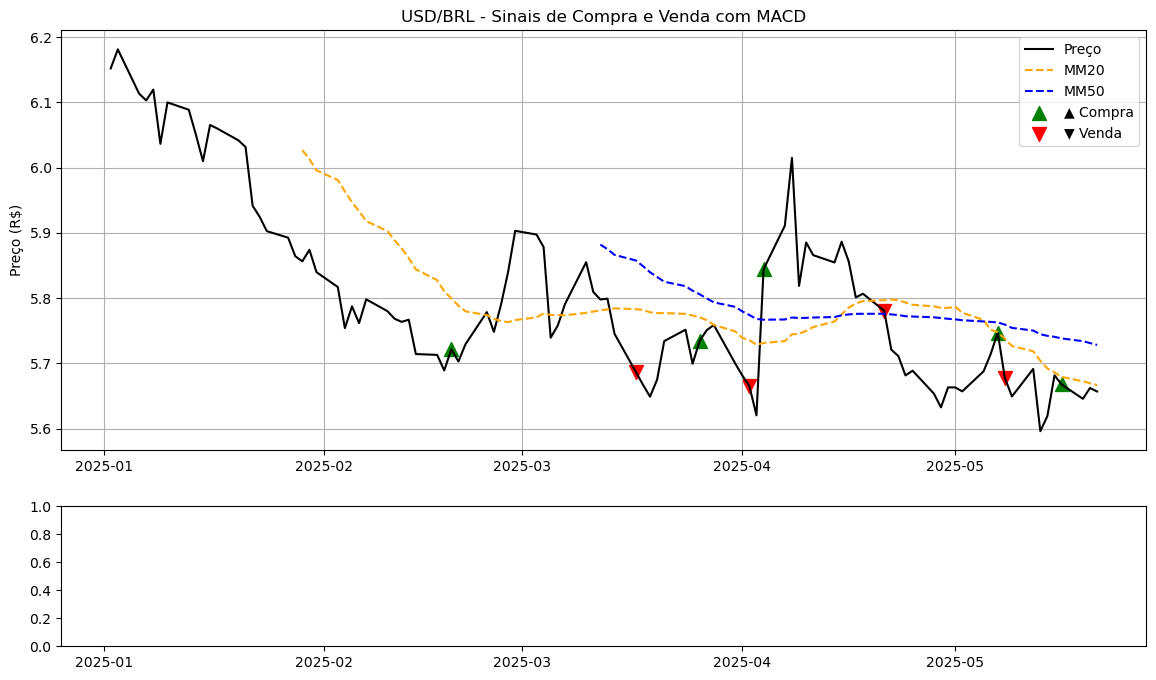

In [6]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Crear figura con dos paneles (2 filas, 1 columna)
fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])  # precios más altos

# ---------- PANEL SUPERIOR: PRECIOS + MM + Señales ----------
ax1 = plt.subplot(gs[0])

ax1.plot(dados["Date"], dados["Close"], label="Preço", color="black")
ax1.plot(dados["Date"], dados["MM20"], label="MM20", linestyle="--", color="orange")
ax1.plot(dados["Date"], dados["MM50"], label="MM50", linestyle="--", color="blue")

ax1.scatter(
    dados.loc[dados["Compra"], "Date"],
    dados.loc[dados["Compra"], "Close"],
    label="▲ Compra",
    marker="^",
    color="green",
    s=100
)
ax1.scatter(
    dados.loc[dados["Venda"], "Date"],
    dados.loc[dados["Venda"], "Close"],
    label="▼ Venda",
    marker="v",
    color="red",
    s=100
)

ax1.set_title("USD/BRL - Sinais de Compra e Venda com MACD")
ax1.set_ylabel("Preço (R$)")
ax1.legend()
ax1.grid(True)

# ---------- PANEL INFERIOR: VOLUME ----------
ax2 = plt.subplot(gs[1], sharex=ax1)

ax2.bar(dados["Date"], dados["volume"], color="gray", label="Volume Diário")
ax2.plot(dados["Date"], dados["Volume_Medio"], color="blue", linestyle="--", label="Média 20 dias")

ax2.set_ylabel("Volume")
ax2.set_xlabel("Data")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


In [7]:
!pip install ta


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Eliminar valores nulos por seguridad
dados = dados.dropna()

# Definir variables de entrada (X) y salida (y)
X = dados[["MACD", "MACD_Sinal", "Close", "MM20", "volume", "Volume_Medio"]]
y = dados["Target"]

# Separar entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Crear y entrenar el modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Mostrar resultados
print("📊 DESEMPENHO DO MODELO:\n")
print(classification_report(y_test, y_pred, zero_division=0))


KeyError: "['volume', 'Volume_Medio'] not in index"

In [9]:
# Tomar los datos más recientes (última fila)
dados_atuais = dados.iloc[[-1]][["MACD", "MACD_Sinal", "Close", "MM20", "volume", "Volume_Medio"]]

# Hacer la predicción con el modelo entrenado
predicao = modelo.predict(dados_atuais)[0]

# Traducir la predicción
if predicao == 1:
    decisao = "📈 COMPRAR"
elif predicao == -1:
    decisao = "📉 VENDER"
else:
    decisao = "⏳ ESPERAR"

# Mostrar recomendación
print("🤖 Recomendación de la IA para hoy:")
print(f"➡️ {decisao}")


KeyError: "['volume', 'Volume_Medio'] not in index"

In [10]:
import requests

# Token del bot
token = "7888471808:AAE9_xfoKAN_OBj-KHtAVb6op7NgdCAL2m0"

# ID del chat (provisionalmente tu propio chat con el bot)
chat_id = "@TraderAngelBot"  # Esto funciona si ya le enviaste /start al bot

# Mensaje de prueba
mensaje = "🚀 Hola Ángel! Tu bot ya está conectado correctamente a Telegram."

# URL de la API de Telegram
url = f"https://api.telegram.org/bot{token}/sendMessage"

# Enviar el mensaje
res = requests.post(url, data={"chat_id": chat_id, "text": mensaje})

# Mostrar respuesta
print("✅ Enviado:", res.ok)
print("📨 Respuesta:", res.json())


✅ Enviado: False
📨 Respuesta: {'ok': False, 'error_code': 400, 'description': 'Bad Request: chat not found'}


In [11]:
# Obtener tu chat_id personal
import requests

token = "7888471808:AAE9_xfoKAN_OBj-KHtAVb6op7NgdCAL2m0"

# Solicitar actualizaciones (debes haberle enviado /start al bot antes)
url = f"https://api.telegram.org/bot{token}/getUpdates"
res = requests.get(url)

# Mostrar la respuesta completa
print(res.json())


{'ok': True, 'result': [{'update_id': 991945839, 'message': {'message_id': 4, 'from': {'id': 7083805563, 'is_bot': False, 'first_name': '2 Para 600 Escada', 'language_code': 'es'}, 'chat': {'id': 7083805563, 'first_name': '2 Para 600 Escada', 'type': 'private'}, 'date': 1747848747, 'text': 'Start'}}]}


In [12]:
import requests

token = "7888471808:AAE9_xfoKAN_OBj-KHtAVb6op7NgdCAL2m0"
chat_id = 7083805563
mensaje = "🚀 Recomendación de la IA para hoy: ¡Comprar USD/BRL!"

url = f"https://api.telegram.org/bot{token}/sendMessage"
res = requests.post(url, data={"chat_id": chat_id, "text": mensaje})

print("✅ Enviado:", res.ok)
print("📨 Respuesta:", res.json())


✅ Enviado: True
📨 Respuesta: {'ok': True, 'result': {'message_id': 5, 'from': {'id': 7888471808, 'is_bot': True, 'first_name': 'Trader_angel_bot', 'username': 'TraderAngelBot'}, 'chat': {'id': 7083805563, 'first_name': '2 Para 600 Escada', 'type': 'private'}, 'date': 1747848941, 'text': '🚀 Recomendación de la IA para hoy: ¡Comprar USD/BRL!'}}
